# Table of Contents --> TBU

1. [Feature engineering](#1-bullet) <br>
    I - [Number of orders](#2-bullet) <br>
    II - [Customer location](#3-bullet) <br>
    III - [Time of orders](#4-bullet) <br>
    IV - [Products informations](#5-bullet) <br>
    V - [Reviews informations](#6-bullet) <br>
    VI - [Payment informations](#7-bullet) <br>
    <br>
    
2. [Preprocessing](#8-bullet) <br>
    <br>
    
3. [KMeans](#9-bullet) <br>
    I - [First iteration with few key variables](#10-bullet) <br>
    II - [Visualisation and interpretation of clusters](#11-bullet) <br>
    III - [Adding mean_review_score variable](#12-bullet) <br>
    IV - [Adding customer_state variable](#13-bullet) <br>
    V - [xx](#xx-bullet) <br>
    VI - [xx](#xx-bullet) <br>
    VII - [xx](#xx-bullet) <br>
    <br>
    
4. [DBSCAN](#14-bullet) <br>
    I - [xx](#xx-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    IV - [xx](#xx-bullet) <br>
    V - [xx](#xx-bullet) <br>
    VI - [xx](#xx-bullet) <br>
    VII - [xx](#xx-bullet) <br>
    <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import timeit

from functions import *

In [2]:
# Loading datas

customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')

full_data = pd.read_csv('cleaned_data.csv', sep=',')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_row', 50)

In [4]:
full_data.head()

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,['a9516a079e37a9c9c36b9b78b10169e8'],['7c67e1448b00f6e969d365cea6b010ab'],2017-05-22 15:22:12,1.0,124.99,21.88,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,Not applicable,Not applicable,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,['4aa6014eceb682077f9dc4bffebc05b0'],['b8bc237ba3788b23da09c0f1f3a3288c'],2018-01-18 20:58:32,1.0,289.00,46.48,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Not applicable,Not applicable,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,['bd07b66896d6f1494f5b86251848ced7'],['7c67e1448b00f6e969d365cea6b010ab'],2018-06-05 16:19:10,1.0,139.94,17.79,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,Not applicable,Not applicable,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,['a5647c44af977b148e0a3a4751a09e2e'],['7c67e1448b00f6e969d365cea6b010ab'],2018-03-27 16:31:16,1.0,149.94,23.36,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,Not applicable,Not applicable,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,['9391a573abe00141c56e38d84d7d5b3b'],['4a3ca9315b744ce9f8e9374361493884'],2018-07-31 10:10:09,1.0,230.00,22.25,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25


In [5]:
full_data.shape

(99431, 44)

# 1. Feature engineering <a class="anchor" id="1-bullet"></a>

We will create a new dataframe with one row per customer and with a selection of relevant variables

In [6]:
len(full_data['customer_unique_id'].unique())

96086

In [7]:
data = pd.DataFrame()
data['customer_unique_id'] = full_data['customer_unique_id'].unique()

In [8]:
data.shape

(96086, 1)

## I - Number of orders <a class="anchor" id="2-bullet"></a>

In [9]:
temp_df = pd.DataFrame()
temp_df['customer_unique_id'] = full_data['customer_unique_id'].value_counts().index
temp_df['nb_orders'] = full_data['customer_unique_id'].value_counts().values
temp_df

,customer_unique_id,nb_orders
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7
4,ca77025e7201e3b30c44b472ff346268,7
...,...,...
96081,5b5c96a57b90dd238dd79f6079021707,1
96082,081f07439678af2da7755a0aa572154d,1
96083,9c57789a6a587f4efcfb01e36c106014,1
96084,9e4c21635f640562de1a6976374fba03,1


In [10]:
# Adding number of orders per customer

# Create df to store the nb_orders per customer_unique_id
temp_df = pd.DataFrame()
temp_df['customer_unique_id'] = full_data['customer_unique_id'].value_counts().index
temp_df['nb_orders'] = full_data['customer_unique_id'].value_counts().values

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders
0,861eff4711a542e4b93843c6dd7febb0,1
1,290c77bc529b7ac935b93aa66c333dc3,1
2,060e732b5b29e8181a18229c7b0b2b5e,1
3,259dac757896d24d7702b9acbbff3f3c,1
4,345ecd01c38d18a9036ed96c73b8d066,1


In [11]:
data.shape

(96086, 2)

In [12]:
data[data['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_unique_id,nb_orders
14101,8d50f5eadf50201ccdcedfb9e2ac8455,17


## II - Customer location <a class="anchor" id="3-bullet"></a>

In [13]:
# Location informations : we will keep only customer_state and coordinates, city will creates too many values

var_list = ['customer_unique_id', 'customer_state', 'customer_geolocation_lat', 'customer_geolocation_lng']

# Creating df to store our variables
temp_df = pd.DataFrame()

for var in var_list:
    temp_df[var] = full_data.drop_duplicates(subset='customer_unique_id')[var]

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925


## III - Time of orders <a class="anchor" id="4-bullet"></a>

In [14]:
# Time of orders : first we get the time of the first and the last order of each customer_unique_id

# Creating df to store our variables
temp_df = pd.DataFrame()
temp_df['last_order_time'] = full_data.groupby(by='customer_unique_id')['order_purchase_timestamp'].max()
temp_df['first_order_time'] = full_data.groupby(by='customer_unique_id')['order_purchase_timestamp'].min()

# Transforming in date type
temp_df['last_order_time'] = pd.to_datetime(temp_df['last_order_time'], infer_datetime_format=True, errors='raise')
temp_df['first_order_time'] = pd.to_datetime(temp_df['first_order_time'], infer_datetime_format=True, errors='raise')

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30


In [15]:
# We will compute the mean time between orders of each customer_unique_id

mean_time_between_orders = [] # The list we will add to our df once completed

for time_list in full_data.groupby(by='customer_unique_id')['order_purchase_timestamp'].apply(list): # Getting all order times of each customer_unique_id in a list
    
    if len(time_list) == 1: # If we have only one order we can't compute a difference
        mean_time_between_orders.append(pd._libs.tslibs.timedeltas.Timedelta(0))
    
    else: # If we have 2 or more orders
        
        time_list = pd.to_datetime(time_list, infer_datetime_format=True, errors='raise').sort_values()
        
        diff_times = [] # For each customer_unique_id we will get times differences between each orders in a list

        for i, elt in enumerate(time_list):
            if i == 0: # For the first order time we can't compute a difference with previous order
                pass
            else: # For the second orders and the nexts we compute the difference with previous order
                diff_times.append(time_list[i] - time_list[i-1])

        mean_time_between_orders.append(np.mean(diff_times)) # We take the mean of times between 2 consecutives orders

len(mean_time_between_orders) # Checking we have the right lenght

96086

In [16]:
# Adding the list to our df
data['mean_time_between_orders'] = mean_time_between_orders
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days


In [17]:
data.dtypes

customer_unique_id                   object
nb_orders                             int64
customer_state                       object
customer_geolocation_lat            float64
customer_geolocation_lng            float64
last_order_time              datetime64[ns]
first_order_time             datetime64[ns]
mean_time_between_orders    timedelta64[ns]
dtype: object

## IV - Products informations <a class="anchor" id="5-bullet"></a>

In [18]:
# Creating df to store our variables
temp_df = pd.DataFrame()

# nb_items
temp_df['total_nb_items'] = full_data.groupby(by='customer_unique_id')['nb_items'].sum()
temp_df['mean_nb_items'] = full_data.groupby(by='customer_unique_id')['nb_items'].mean()

# price and freight
temp_df['mean_price'] = full_data.groupby(by='customer_unique_id')['total_price'].mean()
temp_df['mean_freight_value'] = full_data.groupby(by='customer_unique_id')['total_freight_value'].mean()

# product_category
temp_df['prefered_product_category_name'] = full_data.groupby(by='customer_unique_id')['prefered_product_category_name'].agg(pd.Series.mode)
temp_df['prefered_product_category_name'] = select_one_mode_value(temp_df, 'prefered_product_category_name')

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort


For now we won't use products characteristics (lenght, weight...), it doesn't seem useful for a clustering

## V - Reviews informations <a class="anchor" id="6-bullet"></a>

In [19]:
# First we create new variables in full_data before aggregation by customer_unique_id

# To know for a given variable if there is a review or not
def has_review(elt):
    if elt == 'Not applicable':
        return 0
    else:
        return 1

# Application of this function
full_data['has_review'] = full_data['review_id'].apply(has_review)
full_data['has_review_comment_title'] = full_data['review_comment_title'].apply(has_review)
full_data['has_review_comment_message'] = full_data['review_comment_message'].apply(has_review)

# Computing time between delivery and review
def time_diff(time_1, time_2):
    if time_1 == 'Not applicable' or time_2 == 'Not applicable': # If no review we set diff to 0
        return pd._libs.tslibs.timedeltas.Timedelta(0)
    else: # If there is a review we compute the diff
        return pd.to_datetime(time_1) - pd.to_datetime(time_2)

full_data['time_for_review'] = full_data.apply(lambda x: time_diff(x['review_answer_timestamp'], x['order_delivered_customer_date']), axis=1)

# Transforming review_score in NaN and float
def to_float(elt):
    if elt == 'Not applicable':
        return np.nan
    else:
        return float(elt)

full_data['review_score'] = full_data['review_score'].apply(to_float)

In [20]:
full_data[['review_score', 'has_review', 'has_review_comment_title', 'has_review_comment_message', 'time_for_review']]

,review_score,has_review,has_review_comment_title,has_review_comment_message,time_for_review
0,4.0,1,0,0,5 days 11:59:05
1,5.0,1,0,0,12 days 10:02:10
2,5.0,1,0,0,0 days 18:12:08
3,5.0,1,0,0,5 days 02:32:22
4,5.0,1,1,1,7 days 05:04:04
...,...,...,...,...,...
99426,4.0,1,1,0,14 days 15:08:27
99427,5.0,1,0,0,4 days 15:41:20
99428,1.0,1,1,1,-2 days +06:37:52
99429,5.0,1,0,0,3 days 03:35:39


In [21]:
# Now we can create our variables

temp_df = pd.DataFrame()

# % reviews
nb_orders = full_data.groupby(by='customer_unique_id')['customer_unique_id'].apply(len)

temp_df['%_review'] = (full_data.groupby(by='customer_unique_id')['has_review'].sum()) / nb_orders
temp_df['%_review_comment_title'] = (full_data.groupby(by='customer_unique_id')['has_review_comment_title'].sum()) / nb_orders
temp_df['%_review_comment_message'] = (full_data.groupby(by='customer_unique_id')['has_review_comment_message'].sum()) / nb_orders

# mean score
temp_df['mean_review_score'] = full_data.groupby(by='customer_unique_id')['review_score'].mean()

# mean review time
temp_df['mean_time_for_review'] = full_data.groupby(by='customer_unique_id')['time_for_review'].mean()

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04


## VI - Payment informations <a class="anchor" id="7-bullet"></a>

In [22]:
# Creating a df with our variables

temp_df = pd.DataFrame()

# prefered_payment_type
temp_df['prefered_payment_type'] = full_data.groupby(by='customer_unique_id')['prefered_payment_type'].agg(pd.Series.mode)
temp_df['prefered_payment_type'] = select_one_mode_value(temp_df, 'prefered_payment_type')

# payment 
temp_df['total_payment_value'] = full_data.groupby(by='customer_unique_id')['total_payment_value'].sum()
temp_df['mean_payment_value'] = full_data.groupby(by='customer_unique_id')['total_payment_value'].mean()

# Merge
data = pd.merge(data, temp_df, how='left', on='customer_unique_id')
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review,prefered_payment_type,total_payment_value,mean_payment_value
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05,credit_card,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10,credit_card,335.48,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08,credit_card,157.73,157.73
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22,credit_card,173.30,173.30
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04,credit_card,252.25,252.25


In [23]:
data.shape

(96086, 21)

In [24]:
data.dtypes

customer_unique_id                         object
nb_orders                                   int64
customer_state                             object
customer_geolocation_lat                  float64
customer_geolocation_lng                  float64
last_order_time                    datetime64[ns]
first_order_time                   datetime64[ns]
mean_time_between_orders          timedelta64[ns]
total_nb_items                            float64
mean_nb_items                             float64
mean_price                                float64
mean_freight_value                        float64
prefered_product_category_name             object
%_review                                  float64
%_review_comment_title                    float64
%_review_comment_message                  float64
mean_review_score                         float64
mean_time_for_review              timedelta64[ns]
prefered_payment_type                      object
total_payment_value                       float64


In [25]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat           268
customer_geolocation_lng           268
mean_nb_items                      676
mean_price                         676
mean_freight_value                 676
prefered_product_category_name    1988
mean_review_score                  716
dtype: int64

We now have a DataFrame with one row per unique customer and synthetics informations about him and his orders

# 2. Preprocessing <a class="anchor" id="8-bullet"></a>

In [26]:
data.head()

,customer_unique_id,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review,prefered_payment_type,total_payment_value,mean_payment_value
0,861eff4711a542e4b93843c6dd7febb0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05,credit_card,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10,credit_card,335.48,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08,credit_card,157.73,157.73
3,259dac757896d24d7702b9acbbff3f3c,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22,credit_card,173.30,173.30
4,345ecd01c38d18a9036ed96c73b8d066,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04,credit_card,252.25,252.25


In [27]:
# Creation of our matrix

X = data.iloc[:, 1:] # We withdraw customer_unique_id which is our key
print(X.shape)
X.head()

(96086, 20)


,nb_orders,customer_state,customer_geolocation_lat,customer_geolocation_lng,last_order_time,first_order_time,mean_time_between_orders,total_nb_items,mean_nb_items,mean_price,mean_freight_value,prefered_product_category_name,%_review,%_review_comment_title,%_review_comment_message,mean_review_score,mean_time_for_review,prefered_payment_type,total_payment_value,mean_payment_value
0,1,SP,-20.498489,-47.396929,2017-05-16 15:05:35,2017-05-16 15:05:35,0 days,1.0,1.0,124.99,21.88,office_furniture,1.0,0.0,0.0,4.0,5 days 11:59:05,credit_card,146.87,146.87
1,1,SP,-23.727992,-46.542848,2018-01-12 20:48:24,2018-01-12 20:48:24,0 days,1.0,1.0,289.00,46.48,housewares,1.0,0.0,0.0,5.0,12 days 10:02:10,credit_card,335.48,335.48
2,1,SP,-23.531642,-46.656289,2018-05-19 16:07:45,2018-05-19 16:07:45,0 days,1.0,1.0,139.94,17.79,office_furniture,1.0,0.0,0.0,5.0,0 days 18:12:08,credit_card,157.73,157.73
3,1,SP,-23.499702,-46.185233,2018-03-13 16:06:38,2018-03-13 16:06:38,0 days,1.0,1.0,149.94,23.36,office_furniture,1.0,0.0,0.0,5.0,5 days 02:32:22,credit_card,173.30,173.30
4,1,SP,-22.975100,-47.142925,2018-07-29 09:51:30,2018-07-29 09:51:30,0 days,1.0,1.0,230.00,22.25,home_confort,1.0,1.0,1.0,5.0,7 days 05:04:04,credit_card,252.25,252.25


In [28]:
# Transformation of datetimes in exploitable format for the algorithm

from datetime import datetime, timezone

# For dates we compute the difference with timestamp reference date
X['last_order_time'] = X['last_order_time'].apply(datetime.timestamp)
X['first_order_time'] = X['first_order_time'].apply(datetime.timestamp)

# For times differentials we just get it in days
X['mean_time_between_orders'] = X['mean_time_between_orders'].dt.days
X['mean_time_for_review'] = X['mean_time_for_review'].dt.days

In [29]:
# Definition of preprocessing steps

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Defining numerical and categorical columns
categorical_cols = ['customer_state', 'prefered_product_category_name', 'prefered_payment_type']
numerical_cols = list(X.drop(categorical_cols, axis=1).columns)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('stdscaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 3. KMeans <a class="anchor" id="9-bullet"></a>

## I - First iteration with few key variables <a class="anchor" id="10-bullet"></a>

In [104]:
# Simplification with only few variables to begin

X_simplified = X[['nb_orders', 'last_order_time', 'total_payment_value']]
print(X_simplified.shape)
X_simplified.head()

(96086, 3)


,nb_orders,last_order_time,total_payment_value
0,1,1.494940e+09,146.87
1,1,1.515787e+09,335.48
2,1,1.526739e+09,157.73
3,1,1.520954e+09,173.30
4,1,1.532851e+09,252.25


In [31]:
# Only numerical values, we creates a simplified preprocessing

simple_preprocessor = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
    ('stdscaler', StandardScaler())])

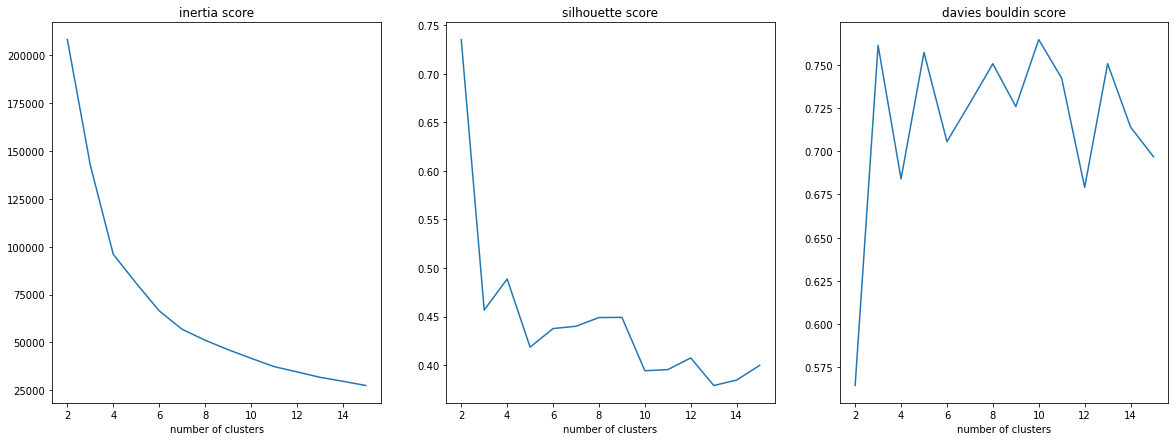

In [41]:
# Test of our clustering with different values of k

processed_X_simplified = simple_preprocessor.fit_transform(X_simplified)

simplified_KMeans = test_KMeans(range(2,16), processed_X_simplified)

4 clusters seems a good candidate : elbow of the inertia score, relatively high silhouette score and relatively low davies bouldin score. 2 clusters has a high silhouette score but won't be so interesting to separate our customers for business considerations

## II - Visualisation and interpretation of clusters <a class="anchor" id="11-bullet"></a>

In [114]:
processed_X_simplified = simple_preprocessor.fit_transform(X_simplified)

In [115]:
# Fitting our model with selected number of clusters

selected_model = KMeans(n_clusters=4, random_state=0)
selected_model.fit(processed_X_simplified)

KMeans(n_clusters=4, random_state=0)

Total explained variance by 2 components : 70.93%


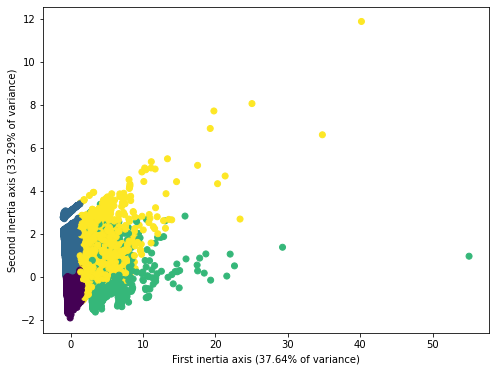

In [43]:
# We use a PCA to display our clustering in the 2 first components

display_clustering_2D(selected_model, processed_X_simplified)

70% of explained variance is maybe not enough to have a good visual interpretation on the 2 axis

In [44]:
# Getting back the dates variables in initial datetime format
X_simplified['last_order_time'] = X_simplified['last_order_time'].apply(lambda p: datetime.fromtimestamp(p, tz=timezone.utc))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
# Look at clusters characteristics

df_clusters = display_clusters_characteristics(selected_model, X_simplified)

# Formatting df

style_dict = {
    'nb_customers' : '{:,}',
    'prop_customers': '{:.2%}',
    'mean_nb_orders' : '{:,.2f}',
    'mean_total_payment_value' : '{:,.2f}',
    'max_total_payment_value' : '{:,.2f}',
    'min_total_payment_value' : '{:,.2f}',
}

for time_var in ['mean_last_order_time', 'max_last_order_time', 'min_last_order_time']:
    df_clusters[time_var] = df_clusters[time_var].apply(lambda p: p.strftime("%Y-%m-%d"))

df_clusters.style.format(style_dict)

,nb_customers,prop_customers,mean_nb_orders,max_nb_orders,min_nb_orders,mean_last_order_time,max_last_order_time,min_last_order_time,mean_total_payment_value,max_total_payment_value,min_total_payment_value
Cluster 1,"52,154",54.28%,1.00,1,1,2018-04-22,2018-10-17,2017-12-13,135.18,703.06,0.00
Cluster 2,"38,549",40.12%,1.00,1,1,2017-08-05,2017-12-13,2016-09-04,134.91,784.80,10.07
Cluster 3,"2,962",3.08%,2.12,17,2,2018-01-21,2018-10-16,2016-10-07,290.31,"2,400.48",34.97
Cluster 4,"2,421",2.52%,1.02,4,1,2018-01-01,2018-09-06,2016-10-04,"1,196.45","13,664.08",654.41


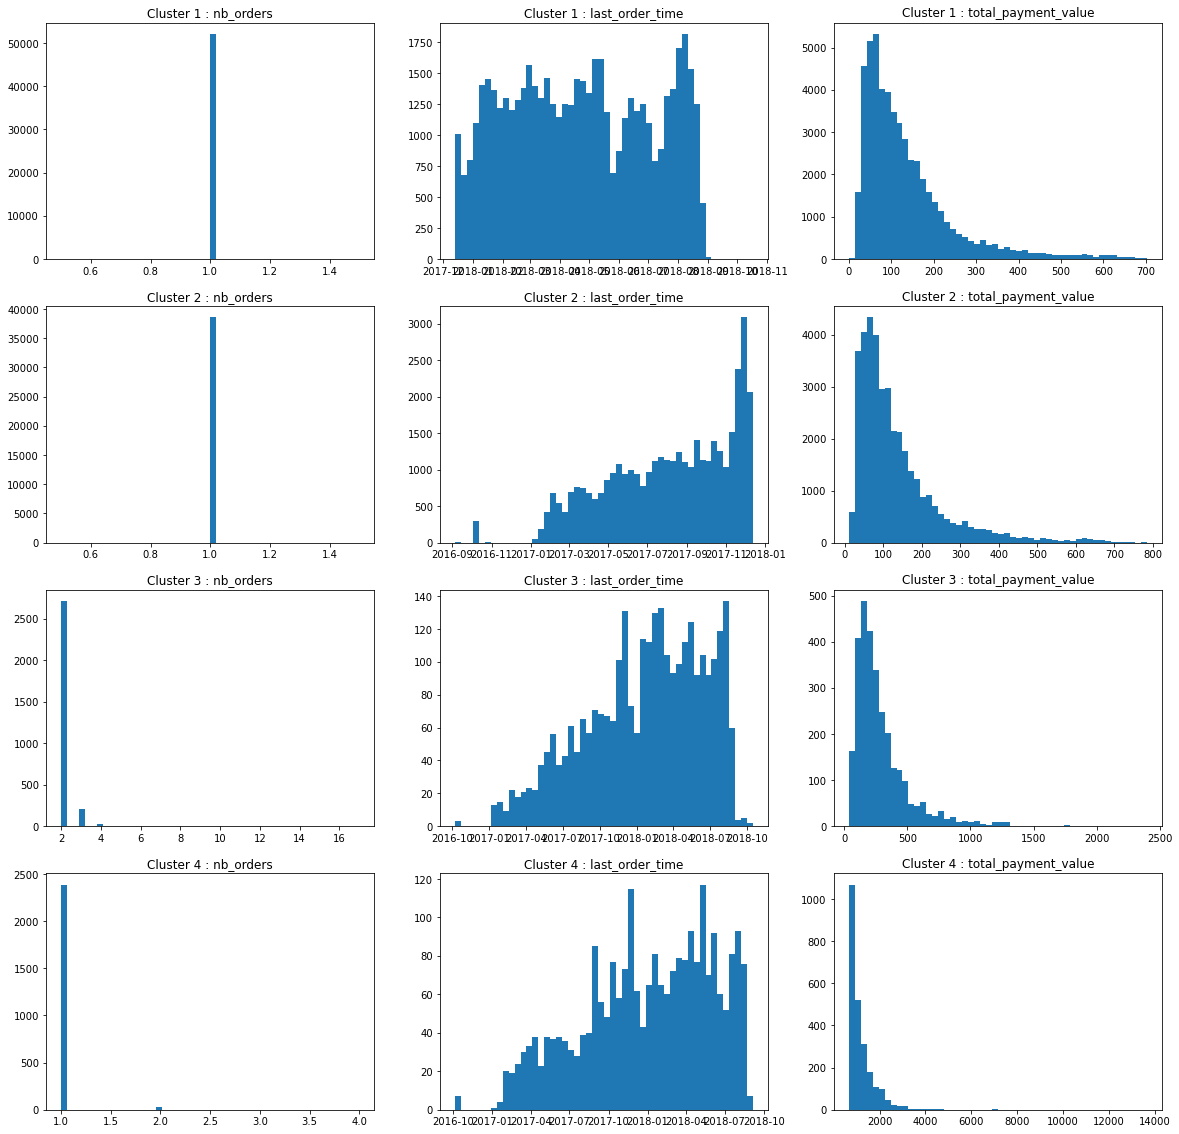

In [53]:
# Visualisation of distribution of variables for each cluster

plot_variables_distributions_clusters(selected_model, X_simplified)

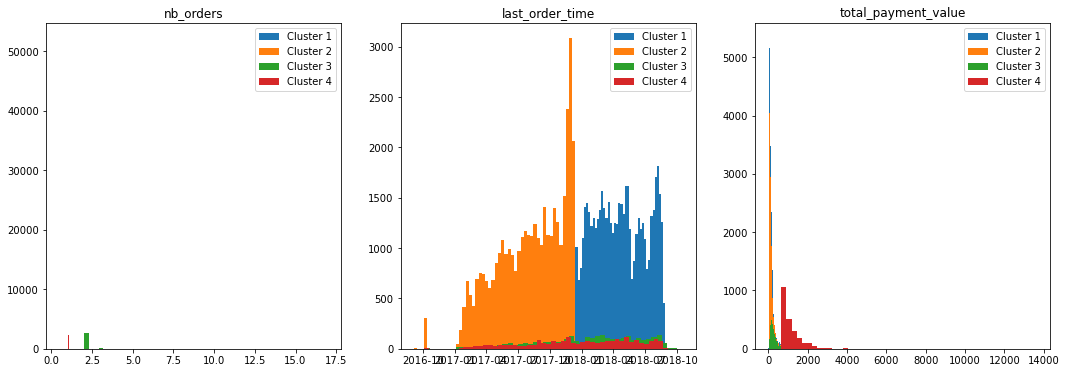

In [55]:
# Visualisation of distribution of variables per clusters on the same chart

plot_variables_aggregated_distributions_clusters(selected_model, X_simplified)

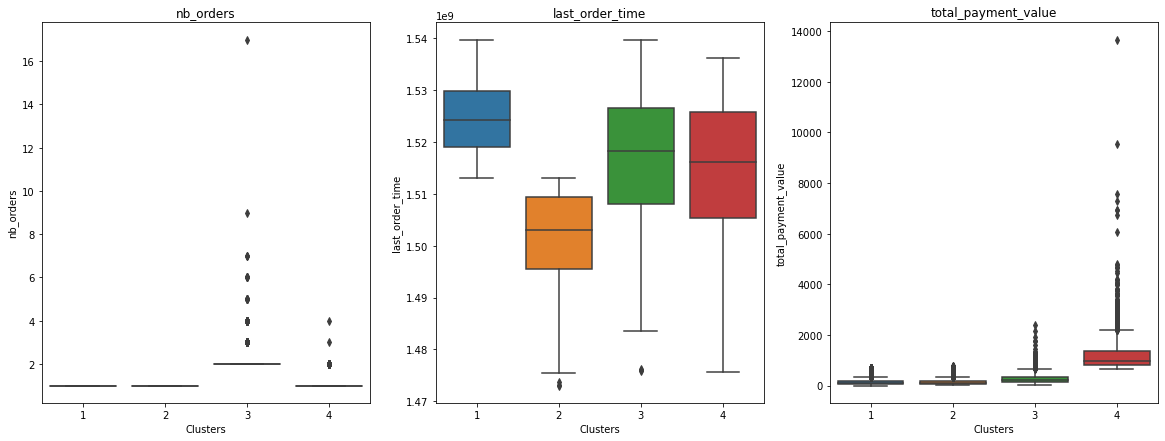

In [116]:
# Visualisation of relation between clusters and variables

relation_variable_clusters(selected_model, X_simplified)

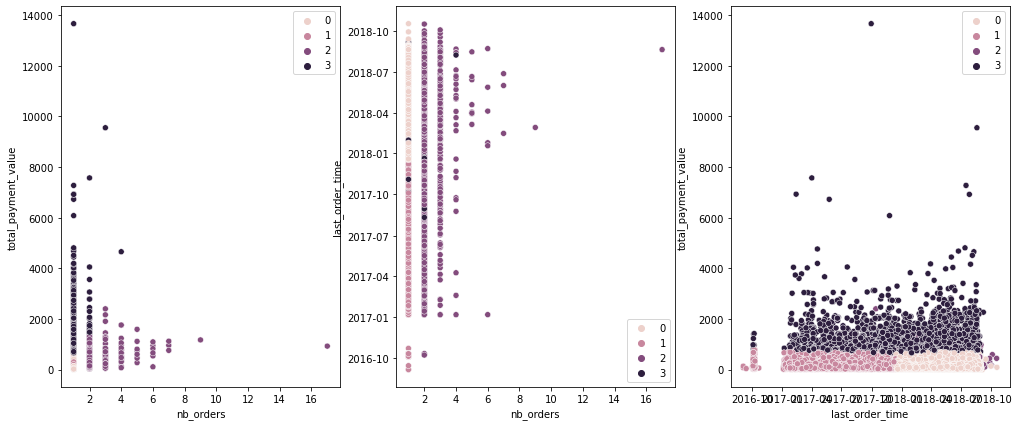

In [68]:
# Bivariate analysis

plt.figure(figsize=(17,7))

plt.subplot(1,3,1)
sns.scatterplot(x='nb_orders', y='total_payment_value', data=X_simplified, hue=selected_model.labels_)

plt.subplot(1,3,2)
sns.scatterplot(x='nb_orders', y='last_order_time', data=X_simplified, hue=selected_model.labels_)

plt.subplot(1,3,3)
sns.scatterplot(x='last_order_time', y='total_payment_value', data=X_simplified, hue=selected_model.labels_)

plt.show()

Interpretation :
- Cluster 1 : Recently active customers with only one order and a low amount spent
- Cluster 2 : Not recently active customers with only one order and a low amount spent
- Cluster 3 : Customers with several orders with medium amount spent
- Cluster 4 : Customers with fews orders with a large amount spent

## III - Adding mean_review_score variable <a class="anchor" id="12-bullet"></a>

In [168]:
# Adding review score

X_simplified = X[['nb_orders', 'last_order_time', 'total_payment_value', 'mean_review_score']]
print(X_simplified.shape)
X_simplified.head()

(96086, 4)


,nb_orders,last_order_time,total_payment_value,mean_review_score
0,1,1.494940e+09,146.87,4.0
1,1,1.515787e+09,335.48,5.0
2,1,1.526739e+09,157.73,5.0
3,1,1.520954e+09,173.30,5.0
4,1,1.532851e+09,252.25,5.0


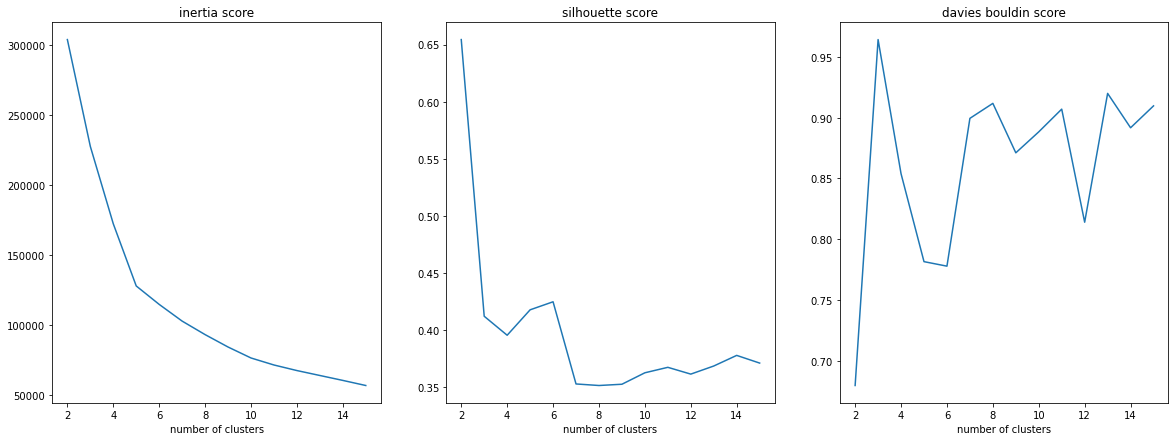

In [70]:
# Test of our clustering with different values of k (preprocessor with only numeric variables is still valid)

processed_X_simplified = simple_preprocessor.fit_transform(X_simplified)

simplified_KMeans_2 = test_KMeans(range(2,16), processed_X_simplified)

5 and 6 clusters seems good candidates

### a. 5 clusters

In [170]:
# Fitting our model with selected number of clusters

selected_model = KMeans(n_clusters=5, random_state=0)
selected_model.fit(processed_X_simplified)

KMeans(n_clusters=5, random_state=0)

Total explained variance by 2 components : 54.21%


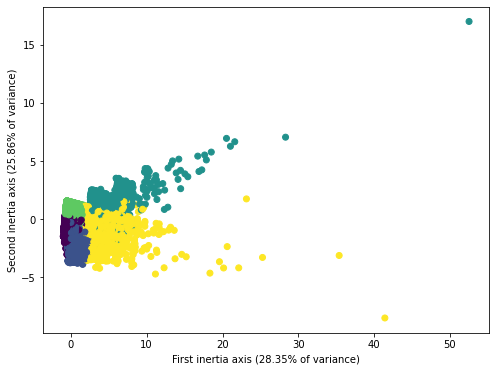

In [75]:
# We use a PCA to display our clustering in the 2 first components

display_clustering_2D(selected_model, processed_X_simplified)

54% of explained variance is maybe not enough to have a good visual interpretation on the 2 axis

In [76]:
# Getting back the dates variables in initial datetime format
X_simplified['last_order_time'] = X_simplified['last_order_time'].apply(lambda p: datetime.fromtimestamp(p, tz=timezone.utc))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [81]:
# Look at clusters characteristics

df_clusters = display_clusters_characteristics(selected_model, X_simplified)

# Formatting df

style_dict = {
    'nb_customers' : '{:,}',
    'prop_customers': '{:.2%}',
    'mean_nb_orders' : '{:,.2f}',
    'mean_total_payment_value' : '{:,.2f}',
    'max_total_payment_value' : '{:,.2f}',
    'min_total_payment_value' : '{:,.2f}',
    'mean_mean_review_score' : '{:,.2f}',
    'max_mean_review_score' : '{:,.0f}',
    'min_mean_review_score' : '{:,.0f}',
}

for time_var in ['mean_last_order_time', 'max_last_order_time', 'min_last_order_time']:
    df_clusters[time_var] = df_clusters[time_var].apply(lambda p: p.strftime("%Y-%m-%d"))

df_clusters.style.format(style_dict)

,nb_customers,prop_customers,mean_nb_orders,max_nb_orders,min_nb_orders,mean_last_order_time,max_last_order_time,min_last_order_time,mean_total_payment_value,max_total_payment_value,min_total_payment_value,mean_mean_review_score,max_mean_review_score,min_mean_review_score
Cluster 1,"31,993",33.30%,1.00,1,1,2017-08-01,2017-12-15,2016-10-03,134.94,818.12,10.07,4.63,5,2
Cluster 2,"16,714",17.39%,1.00,1,1,2017-12-29,2018-10-17,2016-09-04,152.65,829.17,0.00,1.59,3,1
Cluster 3,"2,962",3.08%,2.12,17,2,2018-01-21,2018-10-16,2016-10-07,290.31,"2,400.48",34.97,4.12,5,1
Cluster 4,"42,398",44.13%,1.00,1,1,2018-04-29,2018-09-03,2017-12-13,133.75,758.32,0.00,4.67,5,3
Cluster 5,"2,019",2.10%,1.02,4,1,2018-01-03,2018-09-06,2016-10-04,"1,291.93","13,664.08",696.58,3.96,5,1


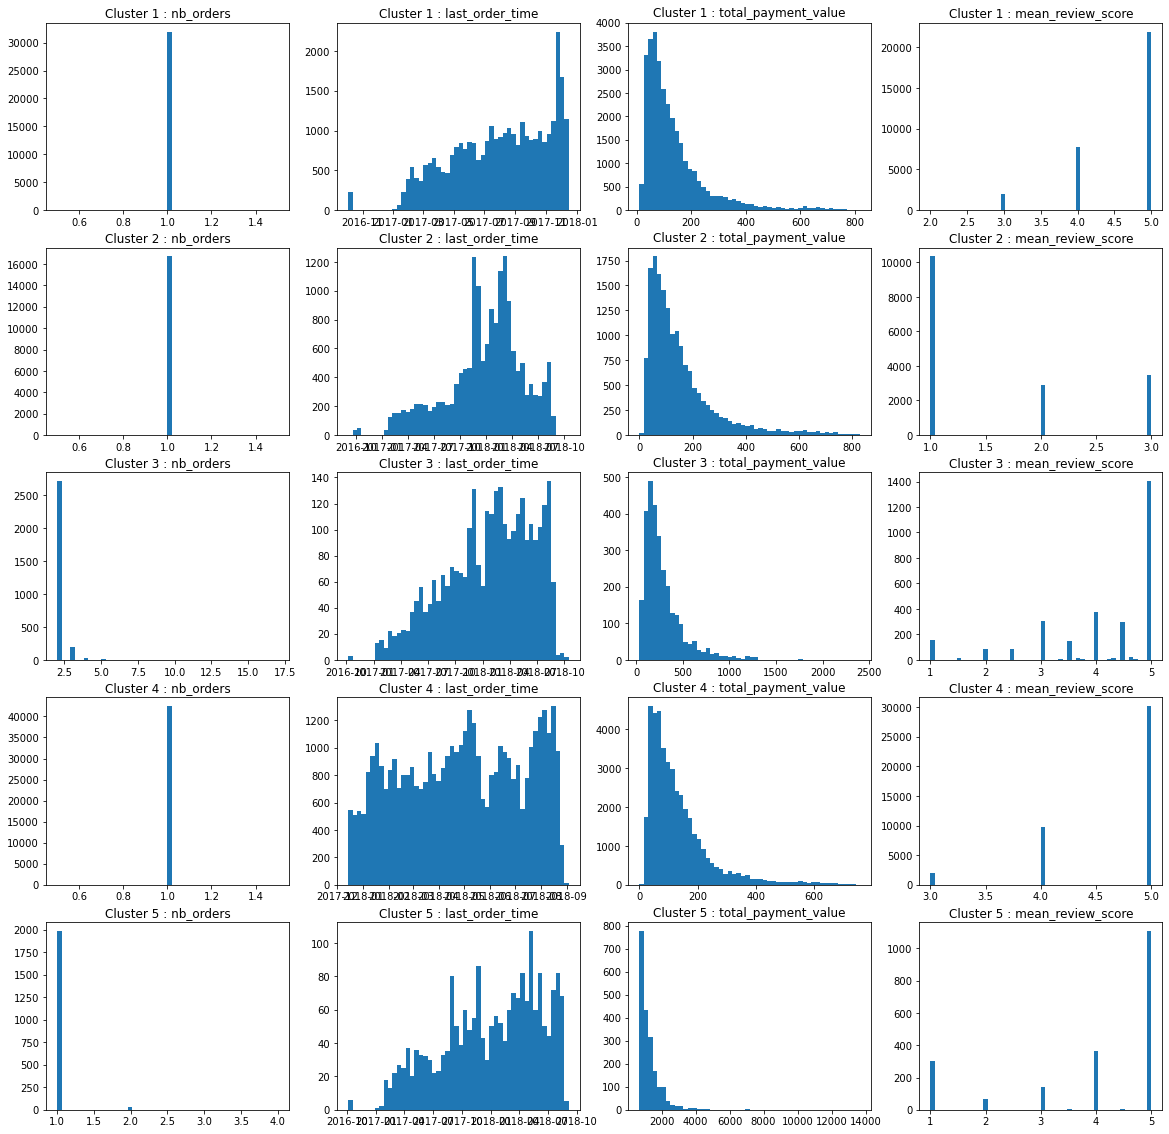

In [78]:
# Visualisation of distribution of variables for each cluster

plot_variables_distributions_clusters(selected_model, X_simplified)

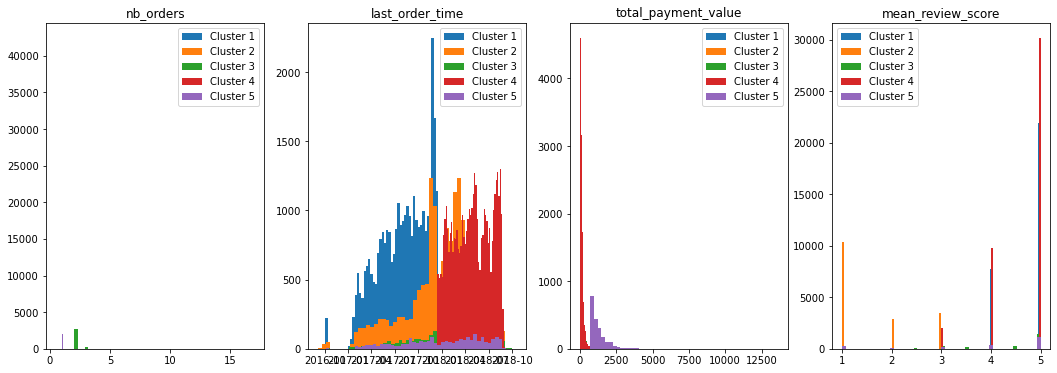

In [79]:
# Visualisation of distribution of variables per clusters on the same chart

plot_variables_aggregated_distributions_clusters(selected_model, X_simplified)

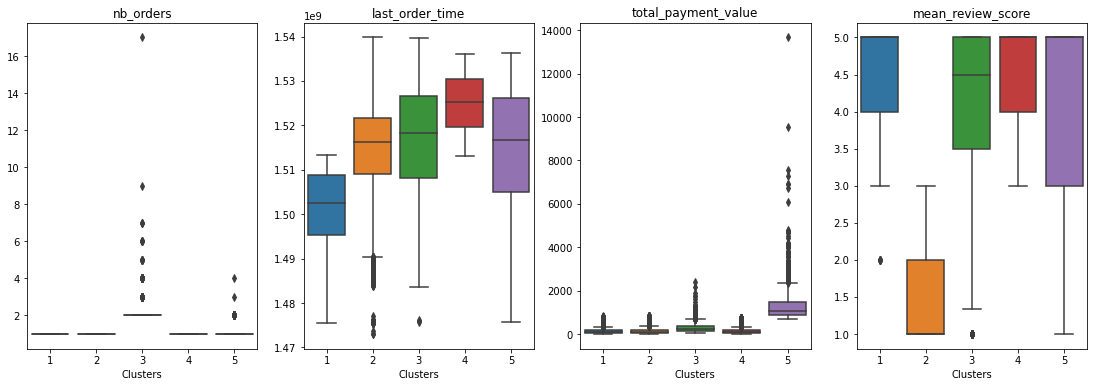

In [127]:
# Visualisation of relation between clusters and variables

relation_variable_clusters(selected_model, X_simplified, figsize=(19,6))

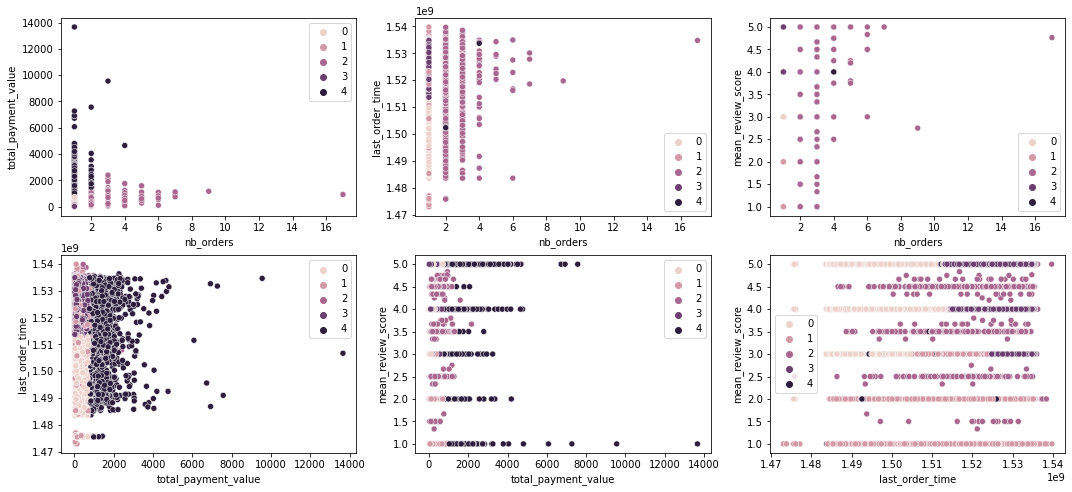

In [128]:
# Bivariate analysis

plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
sns.scatterplot(x='nb_orders', y='total_payment_value', data=X_simplified, hue=selected_model.labels_)

plt.subplot(2,3,2)
sns.scatterplot(x='nb_orders', y='last_order_time', data=X_simplified, hue=selected_model.labels_)

plt.subplot(2,3,3)
sns.scatterplot(x='nb_orders', y='mean_review_score', data=X_simplified, hue=selected_model.labels_)

plt.subplot(2,3,4)
sns.scatterplot(x='total_payment_value', y='last_order_time', data=X_simplified, hue=selected_model.labels_)

plt.subplot(2,3,5)
sns.scatterplot(x='total_payment_value', y='mean_review_score', data=X_simplified, hue=selected_model.labels_)

plt.subplot(2,3,6)
sns.scatterplot(x='last_order_time', y='mean_review_score', data=X_simplified, hue=selected_model.labels_)

plt.show()

Interpretation :
- Cluster 1 : Not recently active customers / only one order / low amount spent / high satisfaction
- Cluster 2 : Not recently active customers / only one order / low amount spent / low satisfaction
- Cluster 3 : Recently active customers / several orders / medium amount spent / high satisfaction
- Cluster 4 : Recently active customers / only one order / low amount spent / high satisfaction
- Cluster 5 : Recently active customers / mostly one order / high amount spent / high satisfaction

### b. 6 clusters

In [83]:
# Fitting our model with selected number of clusters

selected_model = KMeans(n_clusters=6, random_state=0)
selected_model.fit(processed_X_simplified)

KMeans(n_clusters=6, random_state=0)

Total explained variance by 2 components : 54.21%


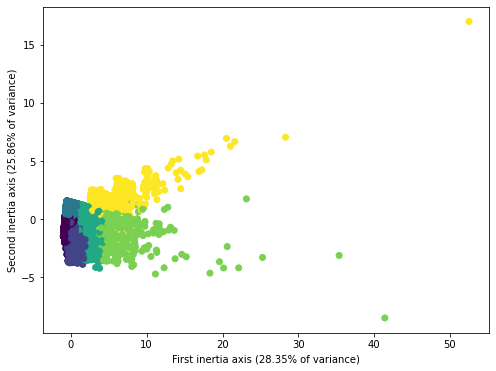

In [84]:
# We use a PCA to display our clustering in the 2 first components

display_clustering_2D(selected_model, processed_X_simplified)

54% of explained variance is maybe not enough to have a good visual interpretation on the 2 axis

In [85]:
# Look at clusters characteristics

df_clusters = display_clusters_characteristics(selected_model, X_simplified)

# Formatting df

style_dict = {
    'nb_customers' : '{:,}',
    'prop_customers': '{:.2%}',
    'mean_nb_orders' : '{:,.2f}',
    'mean_total_payment_value' : '{:,.2f}',
    'max_total_payment_value' : '{:,.2f}',
    'min_total_payment_value' : '{:,.2f}',
    'mean_mean_review_score' : '{:,.2f}',
    'max_mean_review_score' : '{:,.0f}',
    'min_mean_review_score' : '{:,.0f}',
}

for time_var in ['mean_last_order_time', 'max_last_order_time', 'min_last_order_time']:
    df_clusters[time_var] = df_clusters[time_var].apply(lambda p: p.strftime("%Y-%m-%d"))

df_clusters.style.format(style_dict)

,nb_customers,prop_customers,mean_nb_orders,max_nb_orders,min_nb_orders,mean_last_order_time,max_last_order_time,min_last_order_time,mean_total_payment_value,max_total_payment_value,min_total_payment_value,mean_mean_review_score,max_mean_review_score,min_mean_review_score
Cluster 1,"31,271",32.54%,1.00,1,1,2017-07-31,2017-12-15,2016-10-03,124.30,661.75,10.07,4.63,5,2
Cluster 2,"16,420",17.09%,1.00,1,1,2017-12-29,2018-10-17,2016-09-04,144.25,691.49,0.00,1.58,3,1
Cluster 3,"41,486",43.18%,1.00,1,1,2018-04-29,2018-09-03,2017-12-13,123.47,530.16,0.00,4.67,5,3
Cluster 4,"3,474",3.62%,1.00,1,1,2018-01-04,2018-08-28,2016-10-04,784.06,"1,517.70",415.78,4.18,5,1
Cluster 5,466,0.48%,1.07,4,1,2018-01-02,2018-09-06,2017-01-26,"2,225.60","13,664.08","1,478.95",3.62,5,1
Cluster 6,"2,969",3.09%,2.12,17,2,2018-01-21,2018-10-16,2016-10-07,292.48,"1,906.68",34.97,4.12,5,1


One cluster has very few customers, so using k=6 doesn't seem relevant

## IV - Adding customer_state variable <a class="anchor" id="13-bullet"></a>

In [34]:
# Adding customer_state

X_simplified = X[['nb_orders', 'last_order_time', 'total_payment_value', 'mean_review_score', 'customer_state']]
print(X_simplified.shape)
X_simplified.head()

(96086, 5)


,nb_orders,last_order_time,total_payment_value,mean_review_score,customer_state
0,1,1.494940e+09,146.87,4.0,SP
1,1,1.515787e+09,335.48,5.0,SP
2,1,1.526739e+09,157.73,5.0,SP
3,1,1.520954e+09,173.30,5.0,SP
4,1,1.532851e+09,252.25,5.0,SP


In [35]:
# Definition of preprocessing steps

# Defining numerical and categorical columns
categorical_cols = ['customer_state']
numerical_cols = list(X_simplified.drop(categorical_cols, axis=1).columns)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('stdscaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

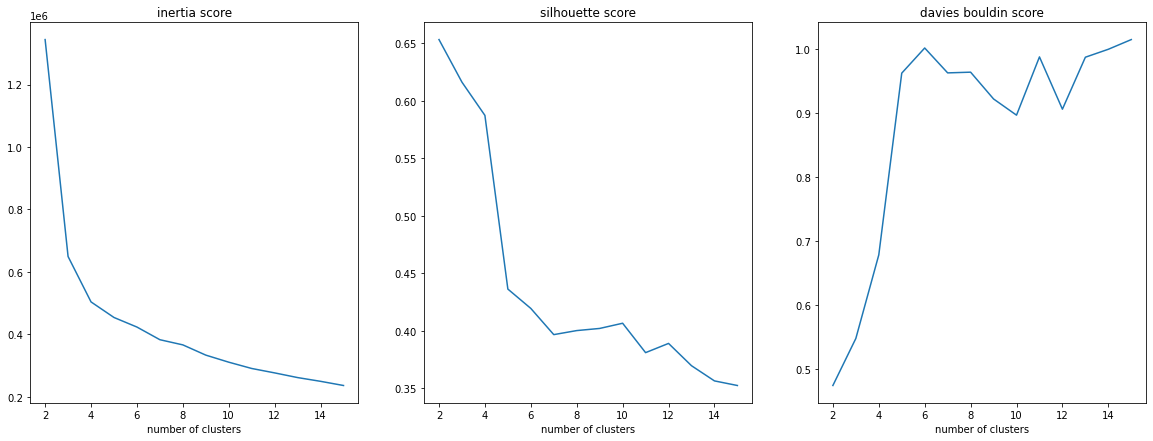

In [103]:
# Test of our clustering with different values of k (we need to use the processor with numeric + categorical values)

processed_X_simplified = preprocessor.fit_transform(X_simplified)

simplified_KMeans = test_KMeans(range(2,16), processed_X_simplified)

4 clusters seems a good candidate

In [38]:
# Fitting our model with selected number of clusters

selected_model = KMeans(n_clusters=4, random_state=0)
selected_model.fit(processed_X_simplified)

KMeans(n_clusters=4, random_state=0)

Total explained variance by 2 components : 94.72%


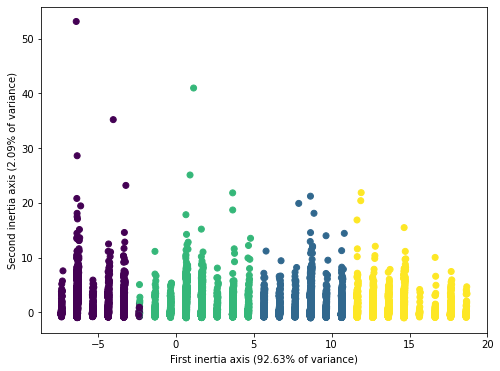

In [39]:
# We use a PCA to display our clustering in the 2 first components

display_clustering_2D(selected_model, processed_X_simplified)

In [40]:
# Getting back the dates variables in initial datetime format
X_simplified['last_order_time'] = X_simplified['last_order_time'].apply(lambda p: datetime.fromtimestamp(p, tz=timezone.utc))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
# Look at clusters characteristics

df_clusters = display_clusters_characteristics(selected_model, X_simplified)

# Formatting df

style_dict = {
    'nb_customers' : '{:,}',
    'prop_customers' : '{:.2%}',
    'mean_nb_orders' : '{:,.2f}',
    'mean_total_payment_value' : '{:,.2f}',
    'max_total_payment_value' : '{:,.2f}',
    'min_total_payment_value' : '{:,.2f}',
    'mean_mean_review_score' : '{:,.2f}',
    'max_mean_review_score' : '{:,.0f}',
    'min_mean_review_score' : '{:,.0f}',
    'mode_%_customer_state' : '{:.2%}'
}

for time_var in ['mean_last_order_time', 'max_last_order_time', 'min_last_order_time']:
    df_clusters[time_var] = df_clusters[time_var].apply(lambda p: p.strftime("%Y-%m-%d"))

df_clusters.style.format(style_dict)

,nb_customers,prop_customers,mean_nb_orders,max_nb_orders,min_nb_orders,mean_last_order_time,max_last_order_time,min_last_order_time,mean_total_payment_value,max_total_payment_value,min_total_payment_value,mean_mean_review_score,max_mean_review_score,min_mean_review_score,mode_customer_state,mode_%_customer_state
Cluster 1,"49,733",51.76%,1.04,17,1,2018-01-08,2018-10-17,2016-09-04,153.90,"9,553.02",0.00,4.16,5,1,SP,81.00%
Cluster 2,"16,448",17.12%,1.03,7,1,2017-12-26,2018-09-25,2016-10-03,177.43,"6,929.31",12.89,4.09,5,1,MG,68.43%
Cluster 3,"20,594",21.43%,1.04,7,1,2017-12-25,2018-10-16,2016-09-04,179.56,"13,664.08",12.89,3.97,5,1,RJ,60.10%
Cluster 4,"9,311",9.69%,1.03,6,1,2017-12-29,2018-08-28,2016-10-04,186.57,"7,274.88",20.60,3.95,5,1,BA,35.18%


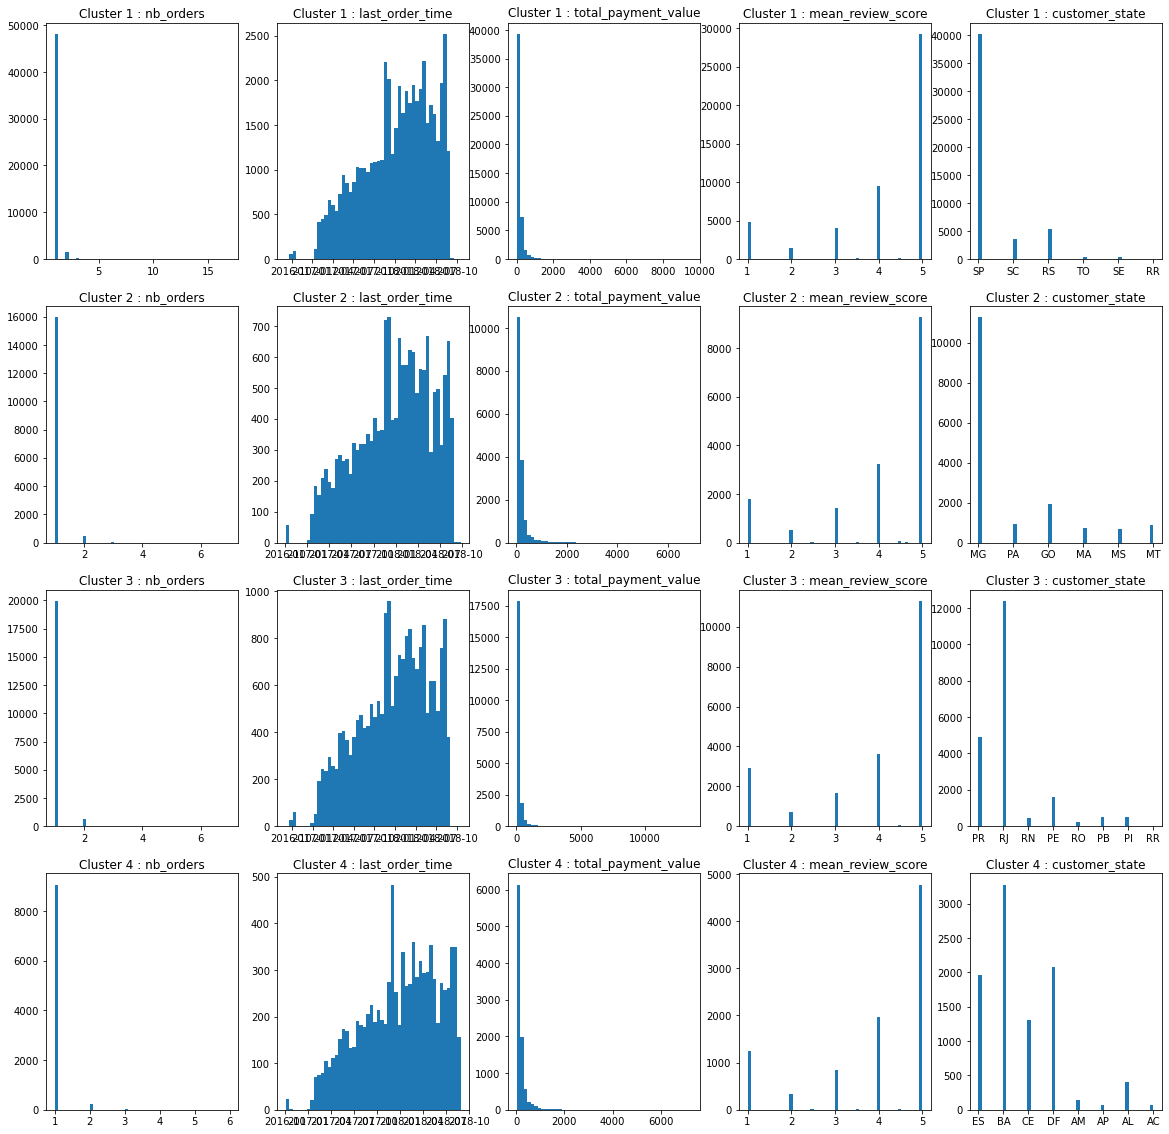

In [42]:
# Visualisation of distribution of variables for each cluster

plot_variables_distributions_clusters(selected_model, X_simplified)

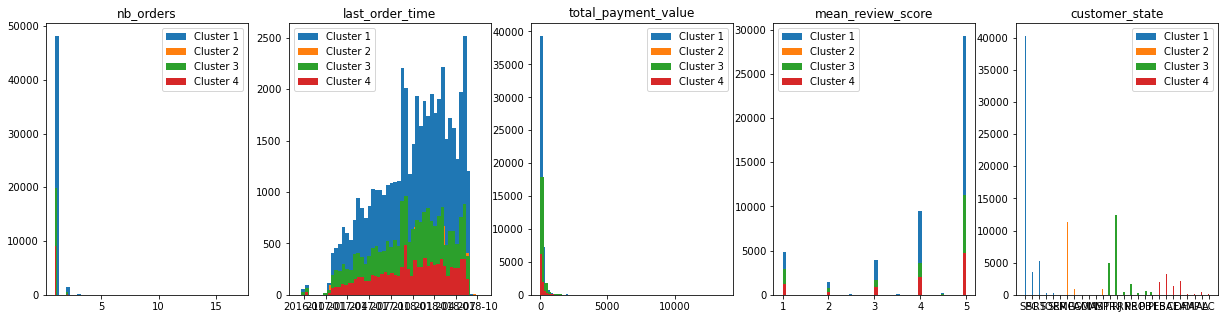

In [43]:
# Visualisation of distribution of variables per clusters on the same chart

plot_variables_aggregated_distributions_clusters(selected_model, X_simplified, figsize=(21,5))

In [44]:
# Visualisation of relation between clusters and variables

relation_variable_clusters(selected_model, X_simplified, figsize=(19,6))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CAF44C2B80> (for post_execute):



KeyboardInterrupt



Introducing customer_state variable doesn't allow us to create clusters with a good differentiation on other variables. The only important difference between clusters is on customer_state, which is probably not the most important information for business considerations

# 4. DBSCAN <a class="anchor" id="14-bullet"></a>

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
# We keep the variables which seems to make more sense for business considerations

X_simplified = X[['nb_orders', 'last_order_time', 'total_payment_value', 'mean_review_score']]
print(X_simplified.shape)
X_simplified.head()

(96086, 4)


,nb_orders,last_order_time,total_payment_value,mean_review_score
0,1,1.494940e+09,146.87,4.0
1,1,1.515787e+09,335.48,5.0
2,1,1.526739e+09,157.73,5.0
3,1,1.520954e+09,173.30,5.0
4,1,1.532851e+09,252.25,5.0


In [32]:
# Only numerical values, we creates a simplified preprocessing

simple_preprocessor = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
    ('stdscaler', StandardScaler())])

processed_X_simplified = simple_preprocessor.fit_transform(X_simplified)

My computer doesn't seem able to run multiple tests on DBSCAN (with a loop on parameters) so i do it one at a time

Even one at a time it's still not able to run with the whole dataset, I unfortunatelly have to reduce it

In [61]:
from sklearn.model_selection import train_test_split

processed_X_reduced_1, processed_X_reduced_2, X_reduced_1, X_reduced_2 = train_test_split(processed_X_simplified, X_simplified, test_size=0.5, random_state=0)

In [36]:
silhouette_scores = []
davies_bouldin_scores = []
nb_clusters = []

In [42]:
# EPS = 50 / min_samples = 50

model = DBSCAN(eps=50, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 1


In [43]:
# EPS = 25 / min_samples = 50

model = DBSCAN(eps=25, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 1


In [44]:
# EPS = 12 / min_samples = 50

model = DBSCAN(eps=12, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 1


In [46]:
# EPS = 6 / min_samples = 50

model = DBSCAN(eps=6, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 1


In [47]:
# EPS = 3 / min_samples = 50

model = DBSCAN(eps=3, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 3


In [48]:
# EPS = 1.5 / min_samples = 50

model = DBSCAN(eps=1.5, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 3


In [49]:
# EPS = 0.75 / min_samples = 50

model = DBSCAN(eps=0.75, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 2


In [50]:
# EPS = 0.5 / min_samples = 50

model = DBSCAN(eps=0.5, min_samples=50, metric='euclidean', n_jobs=-1) 
model.fit(processed_X_reduced_1)

print("Number of clusters : {:.0f}".format(max(model.labels_) + 1))

Number of clusters : 7


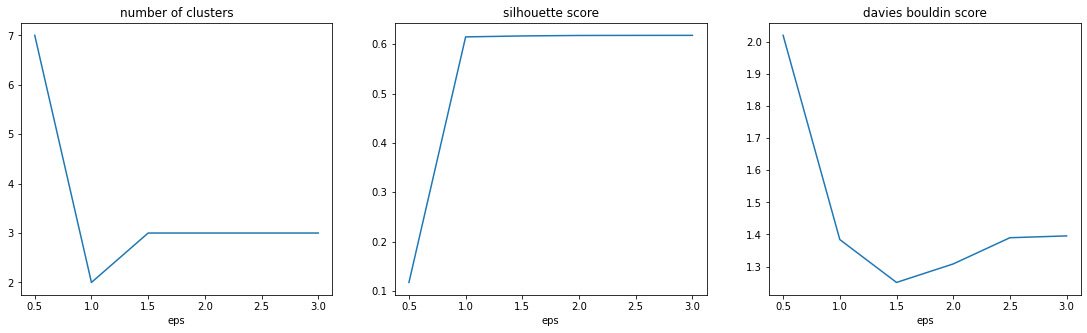

In [54]:
# DBSCAN with min_samples=50

DBSCAN_50 = test_DBSCAN(processed_X_reduced_1, eps_range=np.linspace(0.5,3,6), min_samples=50)

In [56]:
DBSCAN_50

,eps,nb_clusters,silhouette_scores,davies_bouldin_scores
0,0.5,7,0.117331,2.019606
1,1.0,2,0.614675,1.384000
2,1.5,3,0.616599,1.250617
3,2.0,3,0.617550,1.308230
4,2.5,3,0.617699,1.389802
5,3.0,3,0.617785,1.395476


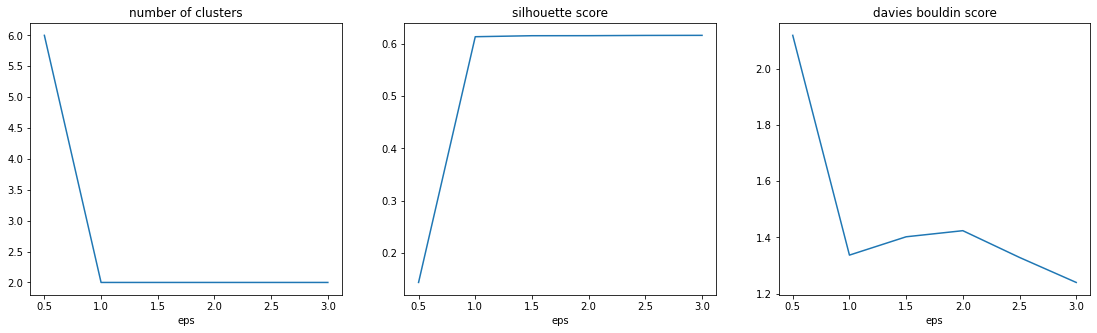

In [57]:
# DBSCAN with min_samples=100

DBSCAN_100 = test_DBSCAN(processed_X_reduced_1, eps_range=np.linspace(0.5,3,6), min_samples=100)

In [58]:
DBSCAN_100

,eps,nb_clusters,silhouette_scores,davies_bouldin_scores
0,0.5,6,0.143520,2.119122
1,1.0,2,0.613875,1.337099
2,1.5,2,0.615785,1.402288
3,2.0,2,0.615864,1.424019
4,2.5,2,0.616336,1.328767
5,3.0,2,0.616479,1.239816


The best combination which maximizes silhouette score and minimizes davies bouldin score is n_samples = 50 and eps = 1.5

In [59]:
selected_model = DBSCAN(eps=1.5, min_samples=50, metric='euclidean', n_jobs=-1) 
selected_model.fit(processed_X_reduced_1)

DBSCAN(eps=1.5, min_samples=50, n_jobs=-1)

Total explained variance by 2 components : 54.81%


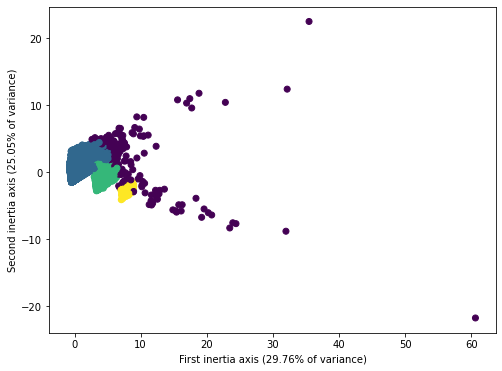

In [60]:
# We use a PCA to display our clustering in the 2 first components

display_clustering_2D(selected_model, processed_X_reduced_1)

In [63]:
# Getting back the dates variables in initial datetime format
X_reduced_1['last_order_time'] = X_reduced_1['last_order_time'].apply(lambda p: datetime.fromtimestamp(p, tz=timezone.utc))

In [64]:
# Look at clusters characteristics

df_clusters = display_clusters_characteristics(selected_model, X_reduced_1)

# Formatting df

style_dict = {
    'nb_customers' : '{:,}',
    'prop_customers' : '{:.2%}',
    'mean_nb_orders' : '{:,.2f}',
    'mean_total_payment_value' : '{:,.2f}',
    'max_total_payment_value' : '{:,.2f}',
    'min_total_payment_value' : '{:,.2f}',
    'mean_mean_review_score' : '{:,.2f}',
    'max_mean_review_score' : '{:,.0f}',
    'min_mean_review_score' : '{:,.0f}',
}

for time_var in ['mean_last_order_time', 'max_last_order_time', 'min_last_order_time']:
    df_clusters[time_var] = df_clusters[time_var].apply(lambda p: p.strftime("%Y-%m-%d"))

df_clusters.style.format(style_dict)

,nb_customers,prop_customers,mean_nb_orders,max_nb_orders,min_nb_orders,mean_last_order_time,max_last_order_time,min_last_order_time,mean_total_payment_value,max_total_payment_value,min_total_payment_value,mean_mean_review_score,max_mean_review_score,min_mean_review_score
Cluster 1,"46,450",96.68%,1.04,17,1,2018-01-01,2018-10-17,2016-10-02,165.23,"7,571.63",9.59,4.09,5,1
Cluster 2,"1,347",2.80%,1.03,4,1,2018-01-03,2018-08-26,2016-10-04,181.57,"13,664.08",15.86,4.10,5,1
Cluster 3,82,0.17%,1.06,2,1,2017-12-22,2018-08-22,2017-01-24,231.13,"2,416.00",23.36,4.09,5,1


We don't have enough customers in one cluster, we could try with n_samples = 100 but we only get 2 clusters which is not really interesting for business considerations. DBSCAN doesn't seem really effective to deal with this dataset